In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import sys
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
sys.path.append('../data/')
import make_dataset

# Naming Convention

Log_CSV = log_csv_exp[num].log

Model = model_exp[num]_[tf-learning]/simple.h5


# Simple model baseline

model baseline accuracy = 60%

In [2]:
DATA_DIR = "../../data/interim/archive/images/"
BATCH_SIZE = 10
SPLIT_SIZE = 0.3


OUTPUT_FIGURE_DIR = "../../reports/figures"

In [3]:
def train_val_generators(DATA_DIR, SPLIT_SIZE, NUM_BATCHES):
    """

    :param DATA_DIR: Directory of the datasets was taken from (string)
    :param SPLIT_SIZE: Split size of test set. (float)
    :param NUM_BATCHES: Amount of batch size
    :return:
    """
    datagen = ImageDataGenerator(rescale=1. / 255, validation_split=SPLIT_SIZE)
    train_generator = datagen.flow_from_directory(directory=DATA_DIR,
                                                  batch_size=NUM_BATCHES,
                                                  class_mode='categorical',
                                                  target_size=(300, 300),
                                                  subset='training',
                                                    shuffle = True,

    )

    validation_generator = datagen.flow_from_directory(directory=DATA_DIR,
                                                       subset='validation',
                                                       batch_size=NUM_BATCHES,
                                                       class_mode='categorical',
                                                       shuffle=True,
                                                       target_size=(300, 300))

    return train_generator, validation_generator

In [11]:
train_ds, test_ds = train_val_generators(DATA_DIR, SPLIT_SIZE, BATCH_SIZE)

Found 70700 images belonging to 101 classes.
Found 30300 images belonging to 101 classes.


# Callbacks

In [4]:
csv_logger = tf.keras.callbacks.CSVLogger('log_csv_exp1.log')


def create_csv_logger(dirname, name):
    return tf.keras.callbacks.CSVLogger(f"{dirname}/{name}")

# Plotting function

In [5]:
def plot_accuracy(history, output_dir, model_name):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig(f"{output_dir}/accuracy_{model_name}")
    plt.show()
    
def plot_loss(history, output_dir, model_name):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig(f"{output_dir}/loss_{model_name}")
    plt.show()

# Model_1 (DONE : no need to re run)

In [34]:
OPTIMIZER = 'adam'
LOSS = 'categorical_crossentropy'
METRICS = ['accuracy']

In [36]:
model_1 = tf.keras.Sequential()

# Conv Layers 1
model_1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(300,300, 3), activation='relu'))

model_1.add(MaxPool2D(pool_size=(2,2)))

model_1.add(Flatten())

model_1.add(Dense(128 , activation='relu'))

# Dropout layers: it helps reduce overfitting by randomly turning off neurons during training
model_1.add(Dropout(0.5))

model_1.add(Dense(101, activation='softmax'))


model_1.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=[METRICS])
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 710432)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               90935424  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 101)               13029     
                                                      

In [37]:
history_model_1 = model_1.fit(train_ds, epochs=5,steps_per_epoch= 10,  validation_data=test_ds,callbacks=[csv_logger])

Epoch 1/5
10/10 [==============================] - 1290s 142s/step - loss: 43.7265 - accuracy: 0.0100 - val_loss: 5.4211 - val_accuracy: 0.0099
Epoch 2/5
10/10 [==============================] - 551s 61s/step - loss: 4.9224 - accuracy: 0.0100 - val_loss: 4.9386 - val_accuracy: 0.0100
Epoch 3/5
10/10 [==============================] - 548s 61s/step - loss: 4.6652 - accuracy: 0.0100 - val_loss: 4.6158 - val_accuracy: 0.0099
Epoch 4/5
10/10 [==============================] - 549s 61s/step - loss: 4.6427 - accuracy: 0.0100 - val_loss: 4.6159 - val_accuracy: 0.0099
Epoch 5/5
10/10 [==============================] - 553s 61s/step - loss: 4.6149 - accuracy: 0.0100 - val_loss: 4.6160 - val_accuracy: 0.0099


In [38]:
# model_1.save('model_exp1_base.h5')

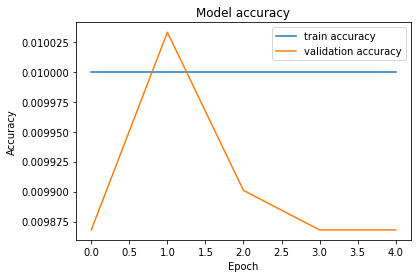

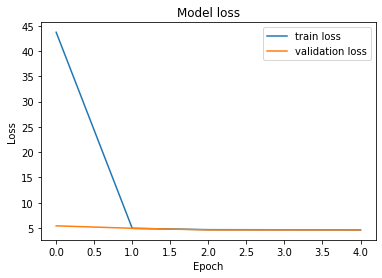

In [45]:

    
plot_accuracy(history_model_1,OUTPUT_FIGURE_DIR, 'model_exp1_base')
plot_loss(history_model_1, OUTPUT_FIGURE_DIR, 'model_exp1_base')



# Model 2 _ VGG Net (Not Transfer Learning) 

### VGG Net (Visual Geometry Group)

In [10]:
OPTIMIZER = 'adam'
LOSS = 'categorical_crossentropy'
METRICS = ['accuracy']

csv_logger = create_csv_logger('../../reports', "/log_csv_vgg_custom_exp1.log")

In [13]:
custom_vgg_1 = tf.keras.Sequential()
custom_vgg_1.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu", input_shape = (300, 300, 3)))
custom_vgg_1.add(Dropout(0.4))
custom_vgg_1.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu"))
custom_vgg_1.add(Dropout(0.4))
custom_vgg_1.add(MaxPooling2D((2, 2)))

custom_vgg_1.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
custom_vgg_1.add(Dropout(0.4))
custom_vgg_1.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
custom_vgg_1.add(Dropout(0.4))
custom_vgg_1.add(MaxPooling2D((2, 2)))

custom_vgg_1.add(Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu"))
custom_vgg_1.add(Dropout(0.4))
custom_vgg_1.add(Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu"))
custom_vgg_1.add(Dropout(0.4))
custom_vgg_1.add(MaxPooling2D((2, 2)))

custom_vgg_1.add(Flatten())
custom_vgg_1.add(Dense(101, activation = "softmax"))

custom_vgg_1.compile(optimizer = OPTIMIZER, loss = LOSS, metrics = METRICS)

custom_vgg_1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 dropout_8 (Dropout)         (None, 300, 300, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 300, 300, 32)      9248      
                                                                 
 dropout_9 (Dropout)         (None, 300, 300, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 150, 150, 64)      18496     
                                                      

In [14]:
history_model_2 = custom_vgg_1.fit(train_ds, epochs=5,steps_per_epoch= 10,  validation_data=test_ds,callbacks=[csv_logger])

Epoch 1/5
10/10 [==============================] - 2654s 294s/step - loss: 12.8070 - accuracy: 0.0200 - val_loss: 4.6151 - val_accuracy: 0.0099
Epoch 2/5
10/10 [==============================] - 2555s 282s/step - loss: 4.6164 - accuracy: 0.0100 - val_loss: 4.6151 - val_accuracy: 0.0099
Epoch 3/5
10/10 [==============================] - 2648s 294s/step - loss: 4.6128 - accuracy: 0.0100 - val_loss: 4.6152 - val_accuracy: 0.0099
Epoch 4/5
10/10 [==============================] - 2596s 288s/step - loss: 4.6270 - accuracy: 0.0300 - val_loss: 4.6152 - val_accuracy: 0.0099
Epoch 5/5
10/10 [==============================] - 2549s 283s/step - loss: 4.6149 - accuracy: 0.0000e+00 - val_loss: 4.6152 - val_accuracy: 0.0099


<AxesSubplot:>

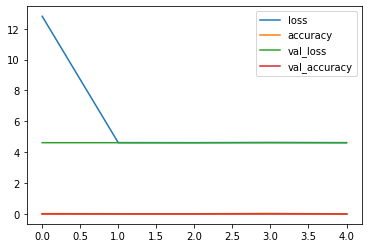

In [15]:
pd.DataFrame(history_model_2.history).plot()

In [16]:
tf.random.set_seed(42)

custom_vgg_1 = tf.keras.Sequential()
custom_vgg_1.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu", input_shape = (300, 300, 3)))
custom_vgg_1.add(Dropout(0.4))
custom_vgg_1.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu"))
custom_vgg_1.add(Dropout(0.4))
custom_vgg_1.add(MaxPooling2D((2, 2)))

custom_vgg_1.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
custom_vgg_1.add(Dropout(0.4))
custom_vgg_1.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
custom_vgg_1.add(Dropout(0.4))
custom_vgg_1.add(MaxPooling2D((2, 2)))

custom_vgg_1.add(Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu"))
custom_vgg_1.add(Dropout(0.4))
custom_vgg_1.add(Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu"))
custom_vgg_1.add(Dropout(0.4))
custom_vgg_1.add(MaxPooling2D((2, 2)))

custom_vgg_1.add(Flatten())
custom_vgg_1.add(Dense(101, activation = "softmax"))

custom_vgg_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.03), loss = LOSS, metrics = METRICS)

custom_vgg_1.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 300, 300, 32)      896       
                                                                 
 dropout_14 (Dropout)        (None, 300, 300, 32)      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 300, 300, 32)      9248      
                                                                 
 dropout_15 (Dropout)        (None, 300, 300, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 150, 150, 64)      18496     
                                                      

In [17]:
csv_logger = create_csv_logger('../../reports', "/log_csv_vgg_custom_exp2.log")

In [18]:
history_model_3 = custom_vgg_1.fit(train_ds, epochs=5,steps_per_epoch= 10,  validation_data=test_ds,callbacks=[csv_logger])

Epoch 1/5
10/10 [==============================] - 2625s 290s/step - loss: 340503.1562 - accuracy: 0.0000e+00 - val_loss: 4.6223 - val_accuracy: 0.0099
Epoch 2/5
10/10 [==============================] - 2266s 251s/step - loss: 4.6317 - accuracy: 0.0000e+00 - val_loss: 4.6347 - val_accuracy: 0.0099
Epoch 3/5
10/10 [==============================] - 2310s 256s/step - loss: 4.6494 - accuracy: 0.0100 - val_loss: 4.6427 - val_accuracy: 0.0099
Epoch 4/5
10/10 [==============================] - 2334s 259s/step - loss: 4.6559 - accuracy: 0.0100 - val_loss: 4.6443 - val_accuracy: 0.0099
Epoch 5/5
10/10 [==============================] - 2126s 236s/step - loss: 4.6419 - accuracy: 0.0000e+00 - val_loss: 4.6442 - val_accuracy: 0.0099
